<a href="https://colab.research.google.com/github/tasnimislamraisa/Python_Learning/blob/main/Lab_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('Instagram visits clustering.csv')

In [4]:
dataset.head()

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397


In [5]:
dataset.shape

(2600, 3)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  2600 non-null   int64  
 1   Instagram visit score    2600 non-null   int64  
 2   Spending_rank(0 to 100)  2600 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 61.1 KB


In [21]:
dataset = dataset.drop(columns=['User ID'])

In [22]:
dataset.shape

(2600, 2)

In [23]:
from sklearn.cluster import KMeans

In [24]:
wcss=[]
for i in range(1,15):
  kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmean.fit(dataset)
  wcss.append(kmean.inertia_)

In [25]:
wcss

[3985634.7796717365,
 2079619.3276164362,
 847084.6628392908,
 440248.79151801823,
 416977.5471924149,
 255133.07498870476,
 238954.1573130647,
 214137.3783725202,
 196136.49688789103,
 183239.9861628466,
 162987.21165434763,
 154673.5687607007,
 147410.77148294868,
 141501.0852299772]

Text(0.5, 1.0, 'The Elbow Method')

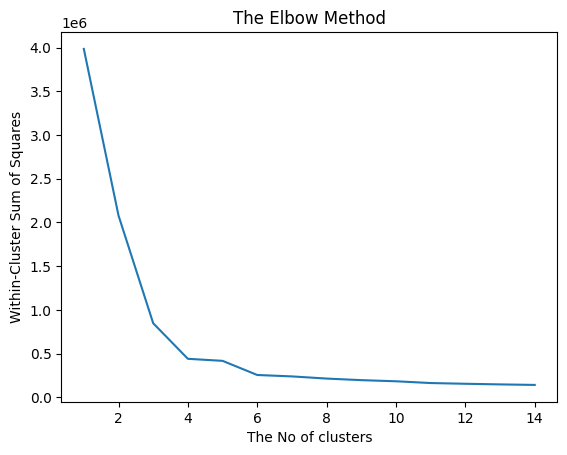

In [26]:
plt.plot(range(1,15),wcss)
plt.xlabel('The No of clusters')

plt.ylabel('Within-Cluster Sum of Squares')
plt.title('The Elbow Method')


In [41]:
kmean=KMeans(n_clusters=4,init='k-means++',random_state=0)

In [42]:
kmean.fit(dataset)

KMeans(n_clusters=4, random_state=0)

In [43]:
cluster_num=kmean.fit_predict(dataset)
cluster_num

array([1, 1, 1, ..., 0, 1, 2], dtype=int32)

We are going to use the fit predict method that returns for each #observation which cluster it belongs to.

# visualization

In [44]:
print(cluster_num.shape)
print(cluster_num.dtype)

(2600,)
int32


In [45]:
dataset.head()

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397


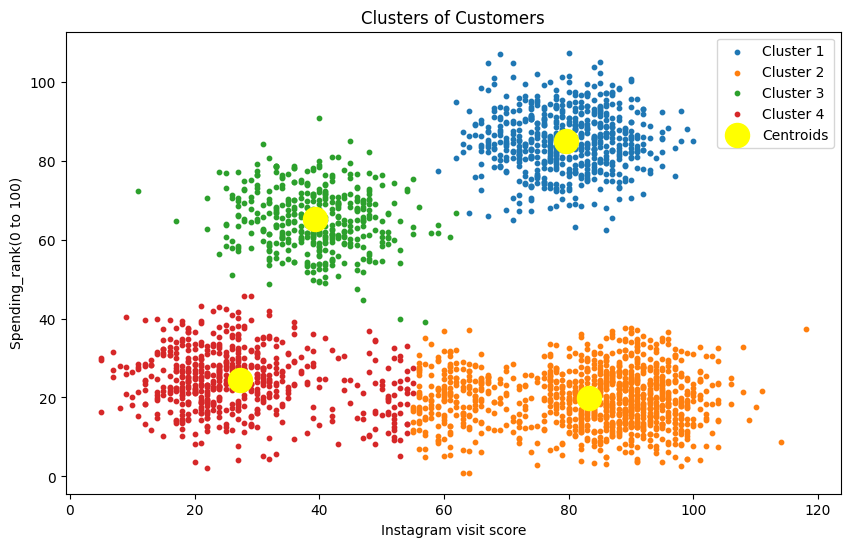

In [47]:

plt.figure(figsize=(10, 6))
k=4
for i in range(k):
    plt.scatter(dataset.iloc[cluster_num == i, 0], dataset.iloc[cluster_num == i, 1],
                    s=10, label=f'Cluster {i+1}')

plt.scatter(kmean.cluster_centers_[:, 0],kmean.cluster_centers_[:, 1], s=300, c='yellow',
            label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending_rank(0 to 100)')
plt.legend()
plt.show()